In [41]:
library(tidyverse)
library(ggpubr)

Warning message:
"package 'ggpubr' was built under R version 4.1.3"


In [4]:
all.df <- read.csv("random_trees_analyzed.csv")[-1]

In [5]:
head(all.df)

,count,pop_entropy,new_exprs,time_step,ave_num_vars,std_num_vars,med_num_vars,ave_expr_len,std_expr_len,med_expr_len,...,stack_size,max_len_identifer,max_len_basis_types,var_prefix,error_file,max_depth,n_vars,bind_all_free_vars,p_range_app,p_range_abs
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<chr>,<lgl>,<int>,<int>,<chr>,<chr>,<chr>
1,1000,3.0000000,1000,0,4.835000,2.003940,5.0,40.605,9.697782,42,...,2000,10,100,x,NA,7,6,True,"(0.3, 0.5)","(0.5, 0.3)"
2,50,0.9550860,25,1,4.100000,2.156386,4.0,28.260,13.152658,26,...,2000,10,100,x,NA,7,6,True,"(0.3, 0.5)","(0.5, 0.3)"
3,12,0.5832859,0,2,3.083333,1.552328,3.0,19.000,8.812869,18,...,2000,10,100,x,NA,7,6,True,"(0.3, 0.5)","(0.5, 0.3)"
4,8,0.4719806,0,3,3.000000,1.732051,2.5,16.500,7.984360,14,...,2000,10,100,x,NA,7,6,True,"(0.3, 0.5)","(0.5, 0.3)"
5,5,0.4190889,0,4,3.000000,1.414214,3.0,15.600,7.418895,14,...,2000,10,100,x,NA,7,6,True,"(0.3, 0.5)","(0.5, 0.3)"
6,5,0.3896949,0,5,3.000000,1.414214,3.0,15.600,7.418895,14,...,2000,10,100,x,NA,7,6,True,"(0.3, 0.5)","(0.5, 0.3)"


In [6]:
colnames(all.df)

[1] "count"                "pop_entropy"          "new_exprs"           
 [4] "time_step"            "ave_num_vars"         "std_num_vars"        
 [7] "med_num_vars"         "ave_expr_len"         "std_expr_len"        
[10] "med_expr_len"         "med_c_factor"         "med_med_depth"       
[13] "med_branching_factor" "savename"             "directory"           
[16] "name"                 "random_seed"          "max_objects"         
[19] "n_collisions"         "output_freq"          "input_file"          
[22] "copy_allowed"         "heap"                 "max_steps"           
[25] "symbol_table_size"    "stack_size"           "max_len_identifer"   
[28] "max_len_basis_types"  "var_prefix"           "error_file"          
[31] "max_depth"            "n_vars"               "bind_all_free_vars"  
[34] "p_range_app"          "p_range_abs"

In [9]:
all.df <- all.df %>% mutate(type = ifelse(grepl("control", name), "Fontana", "BinaryTree"))

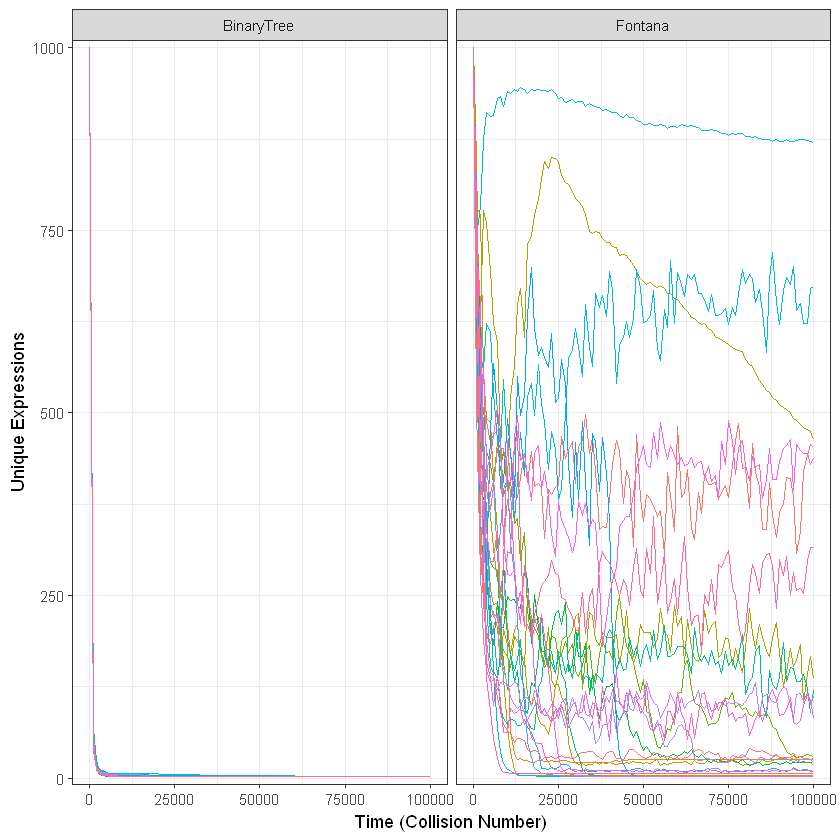

In [40]:
p <- ggplot(all.df) + 
        geom_line(aes(x = time_step*1000, 
                        y = count,
                        color = savename,
                        group = savename)) +
        facet_wrap(~type) + 
        theme_bw(base_size = 11) +
        theme(legend.position = "none") +
        labs(x = "Time (Collision Number)", y = "Unique Expressions") +
        scale_y_continuous(expand = c(0,10))
p
ggsave("BTree_vs_Fontana_unique_expressions.png", p, width = 183, height =247/4, units = "mm")

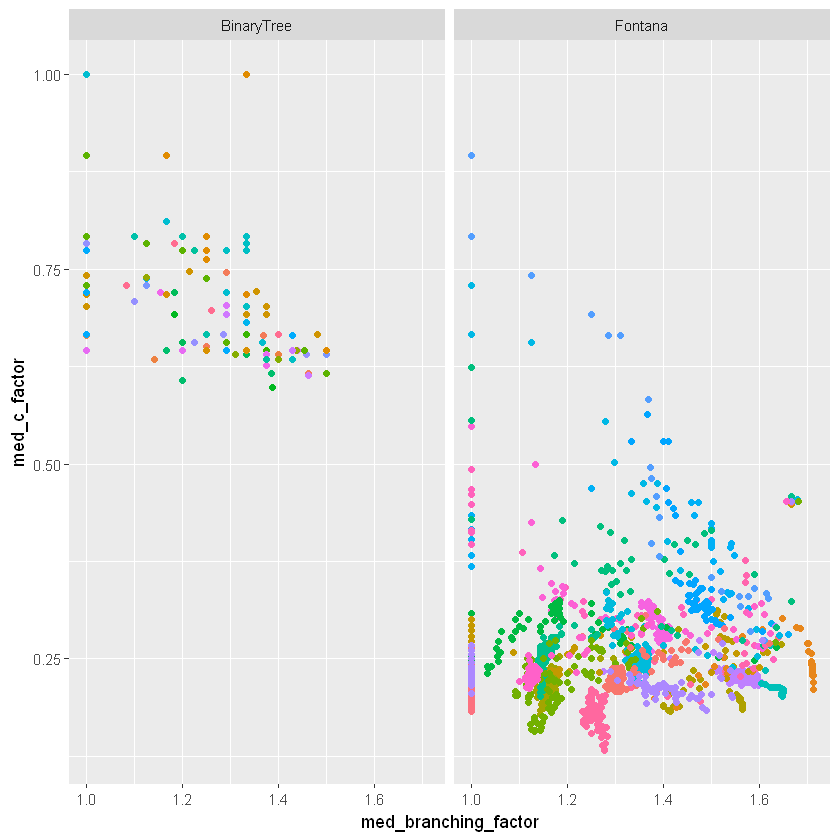

In [17]:
ggplot(all.df) + 
    geom_point(aes(x = med_branching_factor, 
                    y = med_c_factor,
                    color = savename,
                    group = savename)) +
    facet_wrap(~type) + 
    theme(legend.position = "none")
    

In [29]:
btree_inputs <- read.csv("btree_props.csv")[-1]
btree_inputs <- btree_inputs %>% mutate(source = "BinaryTree")
fontana_inputs <- read.csv("fontana_props.csv")[-1]
fontana_inputs <- fontana_inputs %>% mutate(source = "Fontana")
fontana_inputs <- fontana_inputs %>% sample_n(nrow(btree_inputs))
all_inputs = rbind(btree_inputs, fontana_inputs)
head(all_inputs)

,n_nodes,c_factor,max_depth,med_depth,branching_factor,source
,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>
1,17,0.5109329,8,4,1.600000,BinaryTree
2,20,0.4802142,9,5,1.583333,BinaryTree
3,24,0.6549946,7,5,1.769231,BinaryTree
4,20,0.6174183,7,5,1.461538,BinaryTree
5,20,0.6174183,7,5,1.583333,BinaryTree
6,17,0.5839233,7,5,1.600000,BinaryTree


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


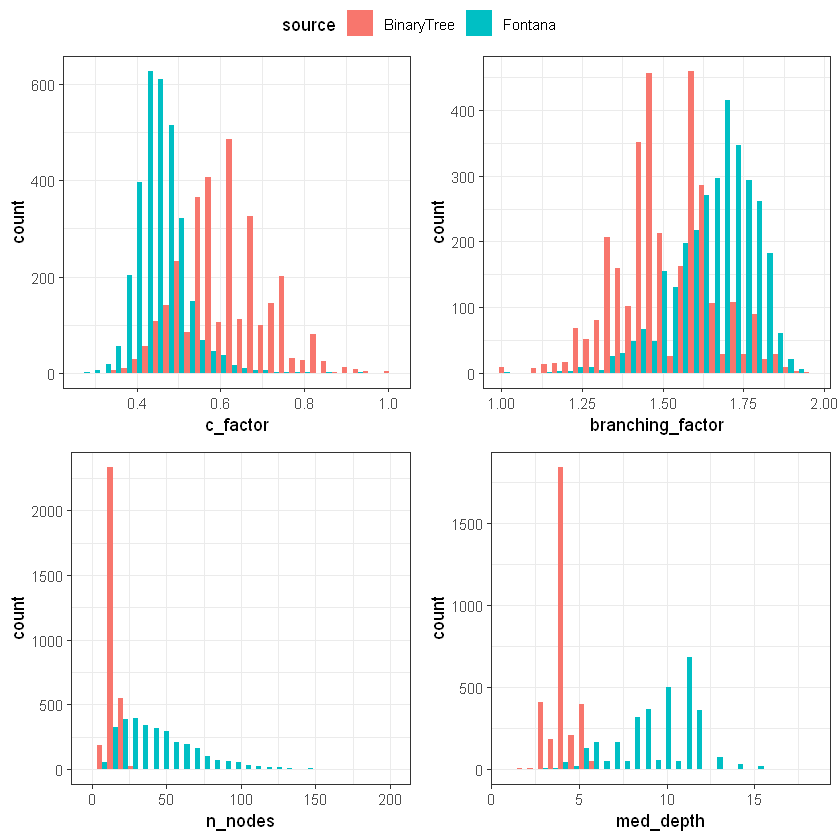

In [45]:
p1 <- ggplot(all_inputs) + 
        geom_histogram(aes(x = c_factor, 
                            fill=source), position = "dodge")+
                            theme_bw(base_size = 11)
p2 <- ggplot(all_inputs) + 
        geom_histogram(aes(x = branching_factor, 
                            fill=source), position = "dodge")+
                            theme_bw(base_size = 11)
p3 <- ggplot(all_inputs) + 
        geom_histogram(aes(x = n_nodes, 
                            fill=source), position = "dodge")+
                            theme_bw(base_size = 11)
p4 <- ggplot(all_inputs) + 
        geom_histogram(aes(x = med_depth, 
                            fill=source), position = "dodge") +
                            theme_bw(base_size = 11)
pall <- ggarrange(p1, p2, p3, p4, ncol = 2, nrow = 2, common.legend = TRUE)
pall

ggsave("BTree_vs_Fontana_Tre_Prop_hist.png", pall, width = 183, height =183, units = "mm")

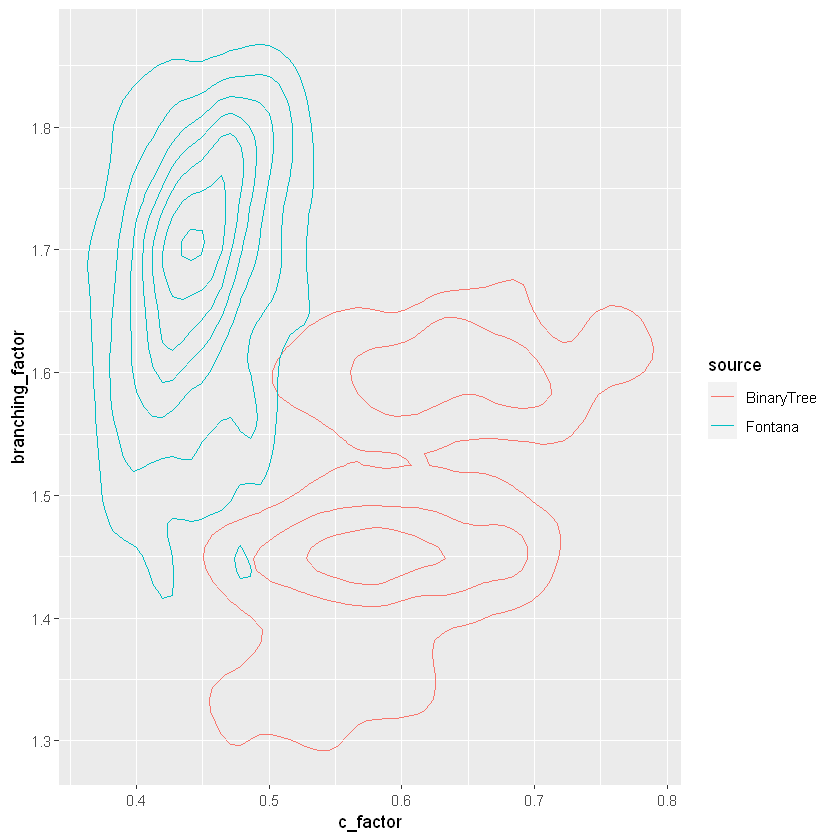

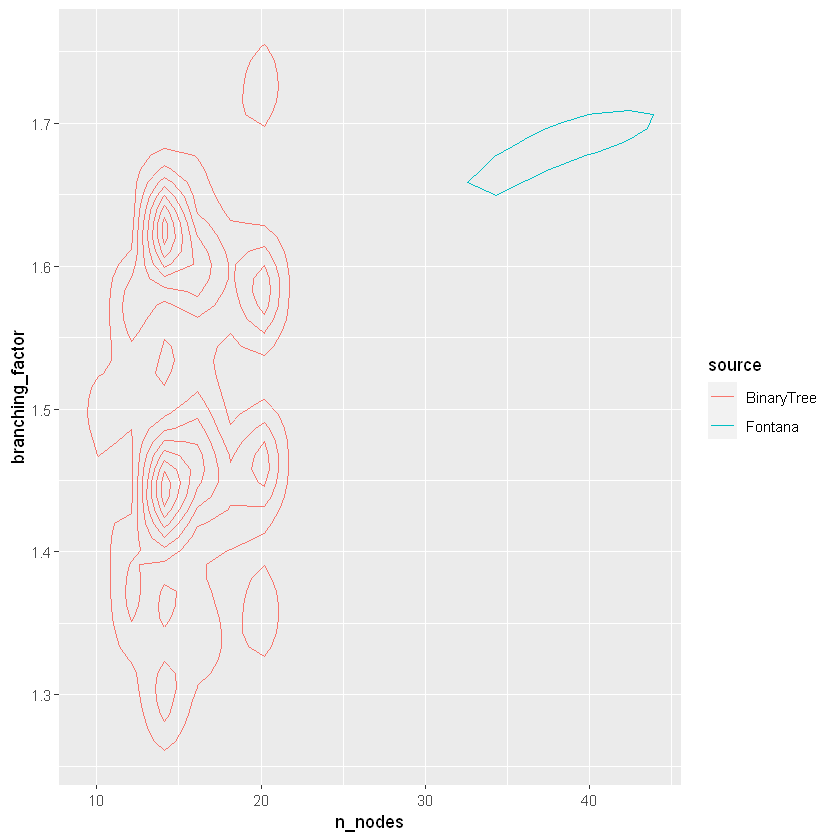

Warning message:
"Computation failed in `stat_density2d()`
Caused by error in `MASS::kde2d()`:
! bandwidths must be strictly positive"
Warning message in min(x, na.rm = na.rm):
"no non-missing arguments to min; returning Inf"
Warning message in max(x, na.rm = na.rm):
"no non-missing arguments to max; returning -Inf"
Warning message in max(f):
"no non-missing arguments to max; returning -Inf"
ERROR while rich displaying an object: Error in `geom_density_2d()`:
! Problem while computing stat.
i Error occurred in the 1st layer.
Caused by error in `seq_len()`:
! argument must be coercible to non-negative integer

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, p

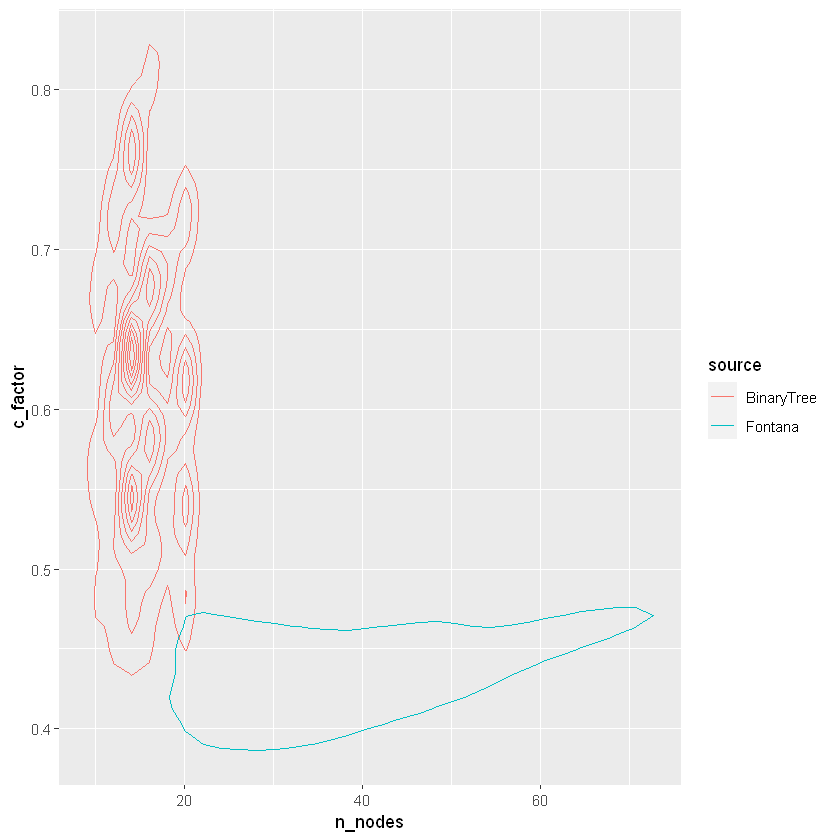

In [35]:
ggplot(all_inputs) + 
    geom_density_2d(aes(x = c_factor, 
                            y =branching_factor,
                            color=source))

ggplot(all_inputs) + 
    geom_density_2d(aes(x = n_nodes, 
                            y =branching_factor,
                            color=source))

ggplot(all_inputs) + 
    geom_density_2d(aes(x = n_nodes, 
                            y =c_factor,
                            color=source))

ggplot(all_inputs) + 
    geom_density_2d(aes(x = n_nodes, 
                            y =med_depth,
                            color=source))

ggplot(all_inputs) + 
    geom_density_2d(aes(x = c_factor, 
                            y =med_depth,
                            color=source))


ggplot(all_inputs) + 
    geom_density_2d(aes(x = branching_factor, 
                            y =med_depth,
                            color=source))